In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import pickle
import astropy.constants as c
import astropy.units as u
import sys
sys.path.insert(0,'../')

In [67]:
import pyathena as pa
pa.__file__

'../pyathena/__init__.py'

In [68]:
from pyathena import ath_hst

In [69]:
hst = ath_hst.read("Blast_Test.hst")
hst.keys()

Reading a history file:Blast_Test.hst


dict_keys(['vol', 'time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE', 'x2KE', 'x3KE', 'total_rad_mom', 'internal_E', 'bubble_vol'])

In [70]:
time = hst['time']
KE = hst['x1KE'] + hst['x2KE'] + hst['x3KE']
KEoverTot = KE / (KE + hst['internal_E'])

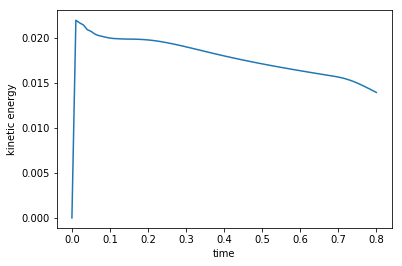

In [71]:
plt.plot(time, KE)
plt.xlabel("time")
plt.ylabel("kinetic energy")
plt.show()

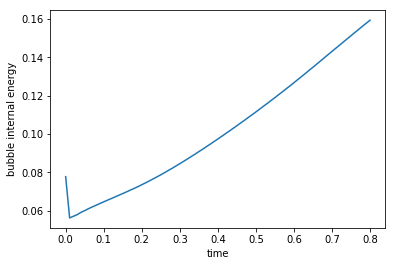

In [72]:
plt.plot(time, hst['internal_E'])
plt.xlabel("time")
plt.ylabel("bubble internal energy")
plt.show()

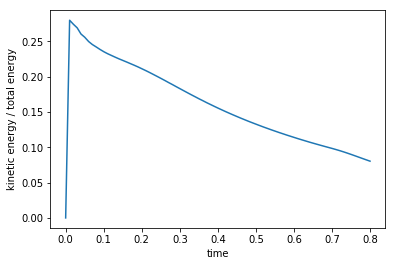

In [73]:
plt.plot(time, KEoverTot)
plt.xlabel("time")
plt.ylabel("kinetic energy / total energy")
plt.show()

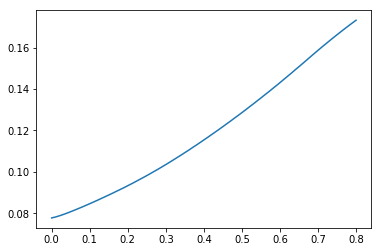

In [74]:
plt.plot(time, KE + hst['internal_E'])
plt.show()

In [75]:
ds0=pa.AthenaDataSet('Blast_Test.0000.vtk')

In [76]:
ds0.field_list

['density', 'velocity', 'pressure']

In [77]:
ds0.derived_field_list

['rho',
 'velocity1',
 'velocity2',
 'velocity3',
 'velocity_magnitude',
 'kinetic_energy1',
 'kinetic_energy2',
 'kinetic_energy3',
 'momentum1',
 'momentum2',
 'momentum3',
 'reynold_stress',
 'reynold_stress1',
 'reynold_stress2',
 'reynold_stress3',
 'sound_speed',
 'temperature',
 'T1',
 'number_density']

In [78]:
d = ds0.read_all_data('density')
p = ds0.read_all_data('pressure')
vx = ds0.read_all_data('velocity1')
print(vx.shape)
vy = ds0.read_all_data('velocity2')
vz = ds0.read_all_data('velocity3')
rad_vel = np.sqrt(vx**2 + vy**2 + vz**2)

(128, 128, 128)


In [79]:
ds0.domain

{'left_edge': array([-1., -1., -1.], dtype=float32),
 'right_edge': array([1., 1., 1.], dtype=float32),
 'dx': array([0.015625, 0.015625, 0.015625], dtype=float32),
 'Lx': array([2., 2., 2.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 128]),
 'ndim': 3,
 'time': 0.0,
 'field_map': {'density': {'read_table': True,
   'nvar': 1,
   'offset': 258,
   'ndata': 2097152,
   'dtype': 'f',
   'dsize': 8388608},
  'velocity': {'read_table': False,
   'nvar': 3,
   'offset': 8388910,
   'ndata': 6291456,
   'dtype': 'f',
   'dsize': 25165824},
  'pressure': {'read_table': True,
   'nvar': 1,
   'offset': 33554758,
   'ndata': 2097152,
   'dtype': 'f',
   'dsize': 8388608}},
 'nscal': 0}

In [80]:
# center of the domain
icen=ds0.domain['Nx']/2
print(icen[2])

64.0


In [81]:
#This is domain information
xmin=ds0.domain['left_edge']
xmax=ds0.domain['right_edge']
dx=ds0.domain['dx']
Nx=ds0.domain['Nx']

# set up cell centered coordinates
x=np.arange(xmin[0],xmax[0],dx[0])+0.5*dx[0]
print(x)
y=np.arange(xmin[1],xmax[1],dx[1])+0.5*dx[1]
z=np.arange(xmin[2],xmax[2],dx[2])+0.5*dx[2]

#This sets up for image plots based on the domain physical size
xyextent=[xmin[0],xmax[0],xmin[1],xmax[1]]
xzextent=[xmin[0],xmax[0],xmin[2],xmax[2]]
yzextent=[xmin[1],xmax[1],xmin[2],xmax[2]]
print(xyextent,xzextent,yzextent)

[-0.9921875 -0.9765625 -0.9609375 -0.9453125 -0.9296875 -0.9140625
 -0.8984375 -0.8828125 -0.8671875 -0.8515625 -0.8359375 -0.8203125
 -0.8046875 -0.7890625 -0.7734375 -0.7578125 -0.7421875 -0.7265625
 -0.7109375 -0.6953125 -0.6796875 -0.6640625 -0.6484375 -0.6328125
 -0.6171875 -0.6015625 -0.5859375 -0.5703125 -0.5546875 -0.5390625
 -0.5234375 -0.5078125 -0.4921875 -0.4765625 -0.4609375 -0.4453125
 -0.4296875 -0.4140625 -0.3984375 -0.3828125 -0.3671875 -0.3515625
 -0.3359375 -0.3203125 -0.3046875 -0.2890625 -0.2734375 -0.2578125
 -0.2421875 -0.2265625 -0.2109375 -0.1953125 -0.1796875 -0.1640625
 -0.1484375 -0.1328125 -0.1171875 -0.1015625 -0.0859375 -0.0703125
 -0.0546875 -0.0390625 -0.0234375 -0.0078125  0.0078125  0.0234375
  0.0390625  0.0546875  0.0703125  0.0859375  0.1015625  0.1171875
  0.1328125  0.1484375  0.1640625  0.1796875  0.1953125  0.2109375
  0.2265625  0.2421875  0.2578125  0.2734375  0.2890625  0.3046875
  0.3203125  0.3359375  0.3515625  0.3671875  0.3828125  0.398

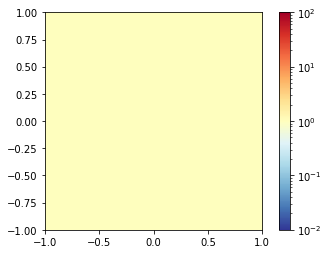

In [82]:
denslice=d[int(icen[2]),:,:]
im=plt.imshow(denslice,norm=LogNorm(),origin='lower')
im.set_extent(xyextent)
im.set_clim(1.e-2,1.e2)
im.set_cmap('RdYlBu_r')
plt.colorbar(im)

In [83]:
#for i in x:
#    for j in y:
#        for k in z:
#            radius = np.sqrt((i - icen[0])**2 + np.sqrt(j - icen[1])**2 + np.sqrt(k - icen[2])**2)
#            rad_vel = 

In [84]:
ds10 = pa.AthenaDataSet('Blast_Test.0010.vtk')
d10 = ds10.read_all_data('density')

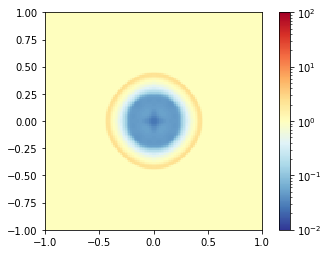

In [85]:
denslice10 = d10[int(icen[2]),:,:]
im=plt.imshow(denslice10,norm=LogNorm(),origin='lower')
im.set_extent(xyextent)
im.set_clim(1.e-2,1.e2)
im.set_cmap('RdYlBu_r')
plt.colorbar(im)

In [86]:
fig = plt.figure()
ims = []

<Figure size 432x288 with 0 Axes>

In [87]:
ims = []
for i in range(81):
    density = pa.AthenaDataSet('Blast_Test.{num:04d}.vtk'.format(num=i)).read_all_data('density')
    density_slice = density[int(icen[2]),:,:]
    im=plt.imshow(density_slice,norm=LogNorm(),origin='lower')
    im.set_extent(xyextent)
    im.set_clim(1.e-2,1.e2)
    im.set_cmap('RdYlBu_r')
    plt.savefig('Blast_Test.{:04d}.png'.format(i),bbox_inches='tight')
    plt.clf()
    #ims.append([im])

<Figure size 432x288 with 0 Axes>

In [88]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [101]:
ds=pa.AthenaDataSet('Blast_Test.{num:04d}.vtk'.format(num=1))
xcc,ycc,zcc=pa.cc_arr(ds.domain)
print(xcc[0], ycc[0], zcc[10])

-0.9921875 -0.9921875 -0.8359375


In [102]:
rcc=np.sqrt(xcc[np.newaxis,np.newaxis,:]**2+ycc[np.newaxis,:,np.newaxis]**2+zcc[:,np.newaxis,np.newaxis]**2)
print(rcc[0,0,10])

1.6332983726860044


In [91]:
rbin=np.linspace(1.e-2,1,100)

In [92]:
den=ds.read_all_data('density')

In [93]:
Vprof,r=np.histogram(rcc,bins=rbin)
Mprof,r=np.histogram(rcc,bins=rbin,weights=den)

In [94]:
dprof=Mprof/Vprof

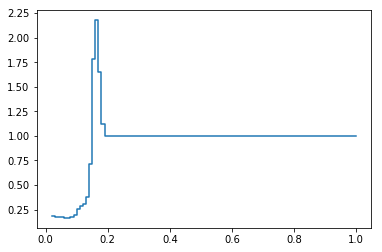

In [95]:
plt.step(r[1:],dprof)